# Disease Predictor ML Model Selection

### Import Libraries

In [3]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-2.0.3-py3-none-win_amd64.whl (99.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [31]:
train_file_path ='Training.csv'
train_data = pd.read_csv(train_file_path)

In [32]:
train_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


### Check for missing values

In [33]:
missing_values = train_data.isnull().sum()
print(missing_values)

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


## EDA for train data

### Get descriptive statistics

In [36]:
train_data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Get the count of each prognosis

In [37]:
print("\nPrognosis counts:\n", train_data['prognosis'].value_counts())


Prognosis counts:
 Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                             

### Visualize the distribution of prognosis

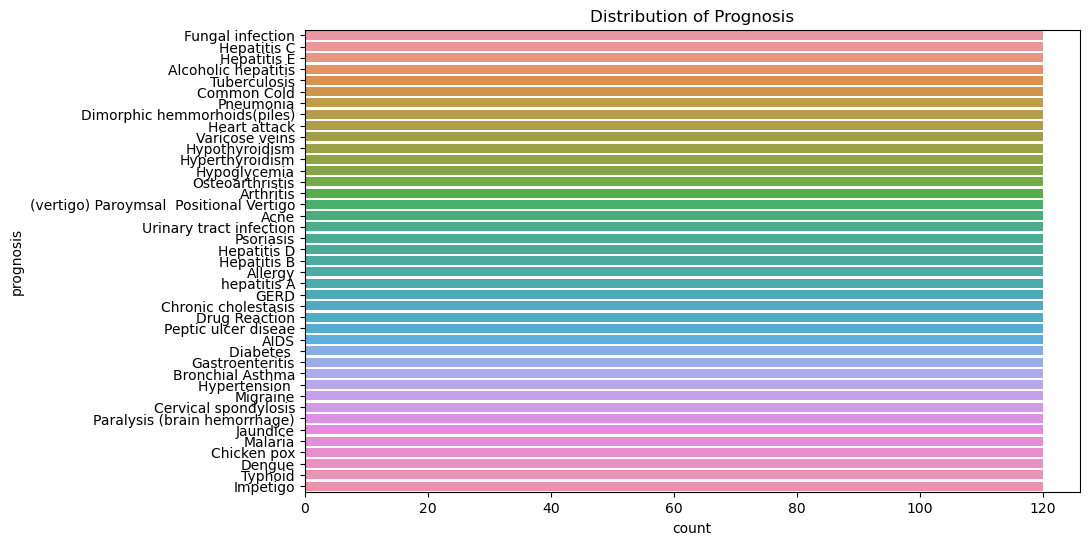

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(y='prognosis', data=train_data, order=train_data['prognosis'].value_counts().index)
plt.title('Distribution of Prognosis')
plt.show()

### Correlation matrix

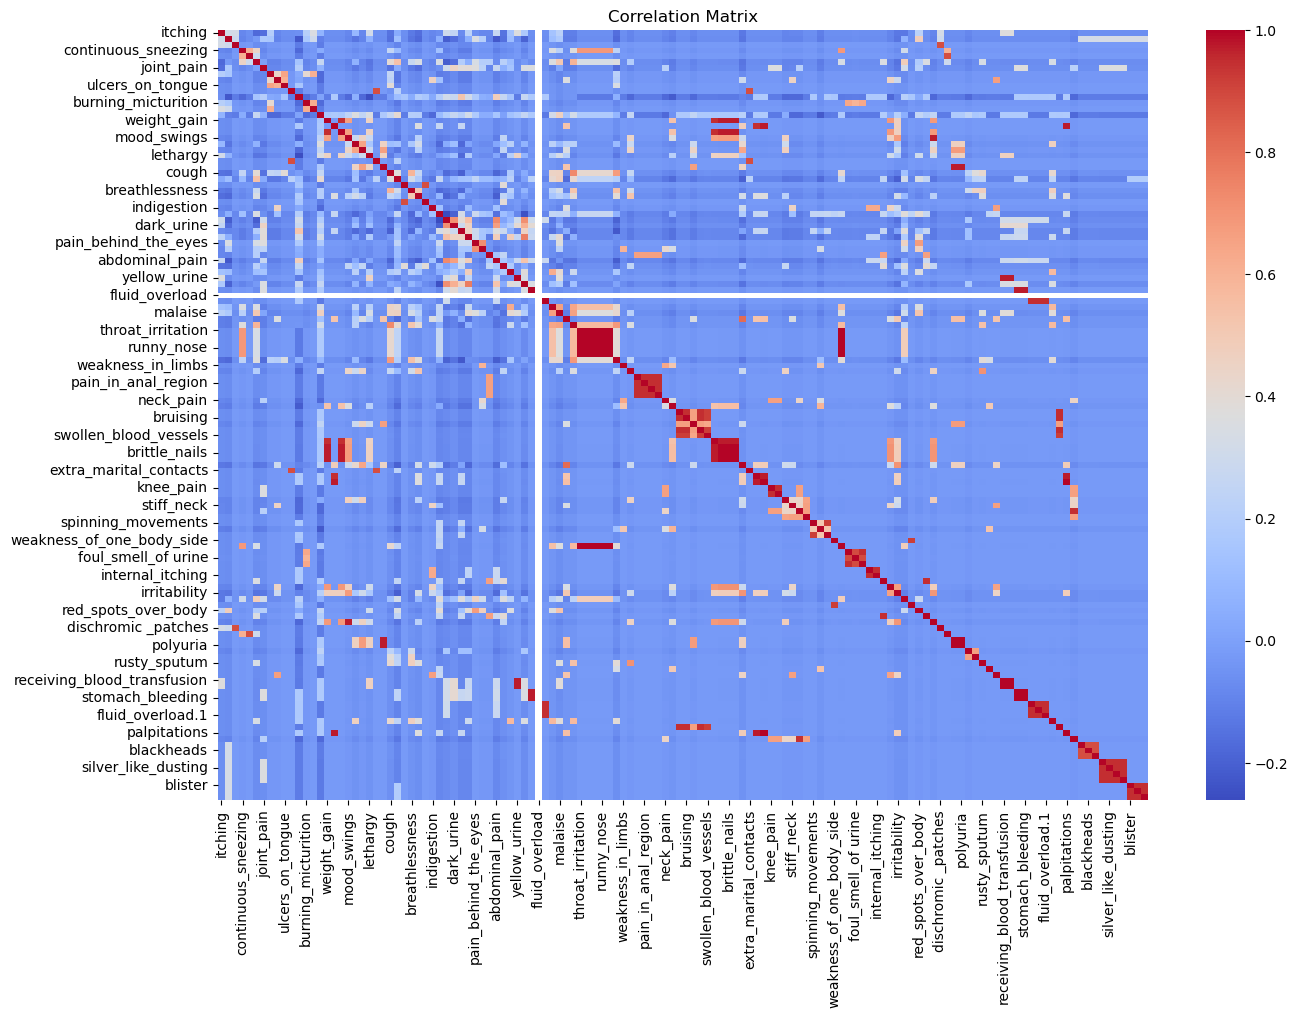

In [50]:
plt.figure(figsize=(15, 10))
sns.heatmap(train_data.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Distribution of a few symptoms

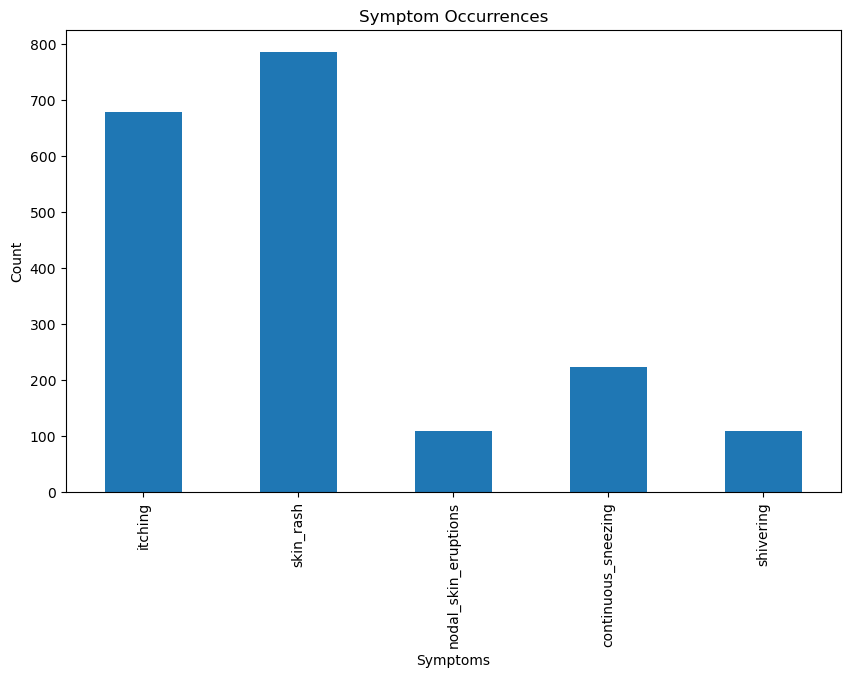

In [52]:
symptoms = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering']
train_data[symptoms].sum().plot(kind='bar', figsize=(10, 6))
plt.title('Symptom Occurrences')
plt.ylabel('Count')
plt.xlabel('Symptoms')
plt.show()

## Model Selecting

### Encode the target variable

In [5]:
label_encoder = LabelEncoder()
train_data['prognosis'] = label_encoder.fit_transform(train_data['prognosis'])

In [6]:
print(train_data['prognosis'])

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int32


In [7]:
# Print the encoded category labels
encoded_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Encoded category labels:\n", encoded_labels)

Encoded category labels:
 {'(vertigo) Paroymsal  Positional Vertigo': 0, 'AIDS': 1, 'Acne': 2, 'Alcoholic hepatitis': 3, 'Allergy': 4, 'Arthritis': 5, 'Bronchial Asthma': 6, 'Cervical spondylosis': 7, 'Chicken pox': 8, 'Chronic cholestasis': 9, 'Common Cold': 10, 'Dengue': 11, 'Diabetes ': 12, 'Dimorphic hemmorhoids(piles)': 13, 'Drug Reaction': 14, 'Fungal infection': 15, 'GERD': 16, 'Gastroenteritis': 17, 'Heart attack': 18, 'Hepatitis B': 19, 'Hepatitis C': 20, 'Hepatitis D': 21, 'Hepatitis E': 22, 'Hypertension ': 23, 'Hyperthyroidism': 24, 'Hypoglycemia': 25, 'Hypothyroidism': 26, 'Impetigo': 27, 'Jaundice': 28, 'Malaria': 29, 'Migraine': 30, 'Osteoarthristis': 31, 'Paralysis (brain hemorrhage)': 32, 'Peptic ulcer diseae': 33, 'Pneumonia': 34, 'Psoriasis': 35, 'Tuberculosis': 36, 'Typhoid': 37, 'Urinary tract infection': 38, 'Varicose veins': 39, 'hepatitis A': 40}


In [8]:
train_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [9]:
print(train_data.shape)

(4920, 133)


### Separate features and target

In [10]:
X_train_full = train_data.drop(columns=['prognosis'])
y_train_full = train_data['prognosis']

### Feature selection

In [11]:
X_train_selected = X_train_full.copy()  # No feature selection, using all variables
selected_features = X_train_full.columns  # All features are selected

### Initialize models

In [12]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=0),
    "AdaBoost Regressor": AdaBoostRegressor()
}

### Train and evaluate models on training data

#### In this part train the model predited train results and compair the trained model actual values 

In [13]:
train_results = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train_full)
    y_train_pred = model.predict(X_train_selected)
    mse = mean_squared_error(y_train_full, y_train_pred)
    mae = mean_absolute_error(y_train_full, y_train_pred)
    r2 = r2_score(y_train_full, y_train_pred)
    train_results[name] = {"MSE": mse, "MAE": mae, "R-squared": r2}

In [14]:
# Print training results
print("Training Performance:")
for name, metrics in train_results.items():
    print(f"\n{name}:")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"MAE: {metrics['MAE']:.4f}")
    print(f"R-squared: {metrics['R-squared']:.4f}")

Training Performance:

Random Forest:
MSE: 0.0000
MAE: 0.0000
R-squared: 1.0000

Linear Regression:
MSE: 3.0623
MAE: 1.0690
R-squared: 0.9781

Lasso:
MSE: 137.7549
MAE: 10.1623
R-squared: 0.0160

Ridge:
MSE: 3.0945
MAE: 1.0763
R-squared: 0.9779

K-Neighbors Regressor:
MSE: 0.0000
MAE: 0.0000
R-squared: 1.0000

Decision Tree:
MSE: 0.0000
MAE: 0.0000
R-squared: 1.0000

XGBRegressor:
MSE: 0.0454
MAE: 0.1045
R-squared: 0.9997

CatBoosting Regressor:
MSE: 0.1434
MAE: 0.2303
R-squared: 0.9990

AdaBoost Regressor:
MSE: 95.8576
MAE: 8.4220
R-squared: 0.3153


#### Random foreset model explain the better varince than the other models also MSE and MAE both are 0 therefore the good model is predicting is Randoem forest model

### Load the test dataset

In [17]:
test_file_path = 'testing.csv'
test_data = pd.read_csv(test_file_path)

### Check for missing values in test data

In [18]:
missing_values = train_data.isnull().sum()
print(missing_values)

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


### Test data has the same feature columns as the selected features in training data

In [19]:
X_test = test_data[selected_features]
y_test = label_encoder.transform(test_data['prognosis'])

### Evaluate models on test data

In [20]:
test_results = {}
for name, model in models.items():
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    test_results[name] = {"MSE": mse, "MAE": mae, "R-squared": r2}

### Print test results for each models

In [22]:
print("\nTest Performance:")
for name, metrics in test_results.items():
    print(f"\n{name}:")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"MAE: {metrics['MAE']:.4f}")
    print(f"R-squared: {metrics['R-squared']:.4f}")


Test Performance:

Random Forest:
MSE: 3.4286
MAE: 0.2857
R-squared: 0.9750

Linear Regression:
MSE: 0.9910
MAE: 0.6259
R-squared: 0.9928

Lasso:
MSE: 134.9123
MAE: 10.0316
R-squared: 0.0170

Ridge:
MSE: 0.6610
MAE: 0.5751
R-squared: 0.9952

K-Neighbors Regressor:
MSE: 0.0000
MAE: 0.0000
R-squared: 1.0000

Decision Tree:
MSE: 0.5952
MAE: 0.1190
R-squared: 0.9957

XGBRegressor:
MSE: 1.0522
MAE: 0.2096
R-squared: 0.9923

CatBoosting Regressor:
MSE: 0.0319
MAE: 0.1358
R-squared: 0.9998

AdaBoost Regressor:
MSE: 90.1332
MAE: 8.1100
R-squared: 0.3433


### Plot R-squared scores for test data

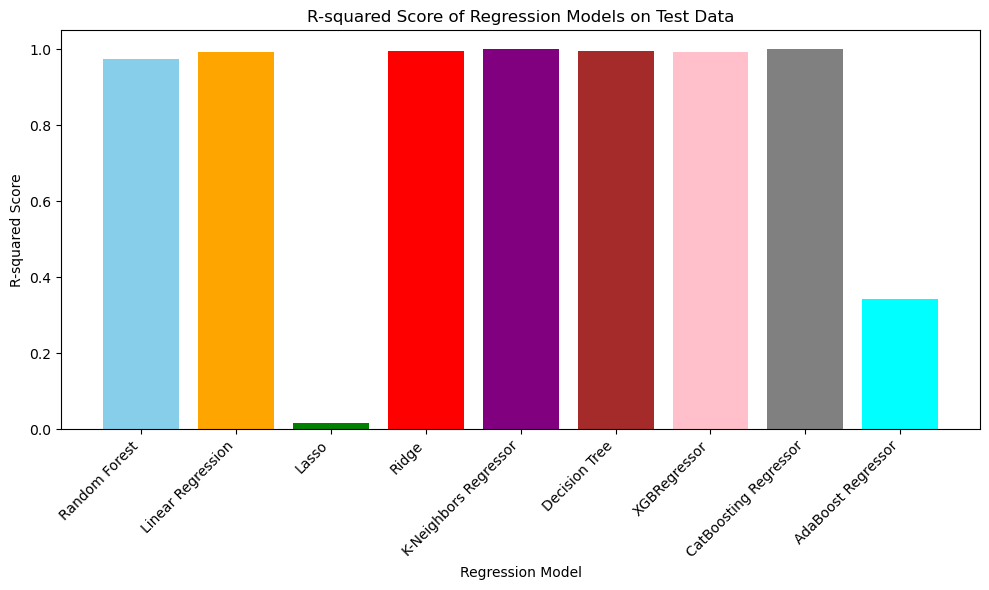

In [25]:
model_names = list(test_results.keys())
r_squared_scores = [test_results[name]["R-squared"] for name in model_names]


# Define a list of colors
colors = [
    'skyblue', 'orange', 'green', 'red', 'purple', 
    'brown', 'pink', 'gray', 'cyan'
]

# Plot the bar chart with different colors
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, r_squared_scores, color=colors[:len(model_names)])
plt.xlabel('Regression Model')
plt.ylabel('R-squared Score')
plt.title('R-squared Score of Regression Models on Test Data')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### For test data Linear regression gives the good R-squred values but the reason is can't use the Linear regression for the categorical data

### Predict on the test set

In [28]:
# Print decoded predicted values for each model
for name, predictions in predicted_values.items():
    print(f"\nPredicted values for the test set using {name}:")
    print(predictions)


Predicted values for the test set using Random Forest:
['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo' 'Impetigo']

Predicted values for the test set using Linear Regression:
['Drug Reaction' 'Alcoholic hepatitis' 'GERD' 'Common Cold'
 'Dimorphic hemmorhoids(piles)' 'Peptic ulcer diseae'
 '(vertigo) Paroymsal  Positional Vertigo' 'Diabetes ' 'Gastroenteritis'
 'Bronchial As